In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox,yeojohnson
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from math import sqrt
%matplotlib inline
import scipy as sp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_excel("/content/drive/MyDrive/ML_module/Bike Sharing Dataset.xlsx")

In [ ]:
df.shape

(17414, 10)

# **Understanding Dataset Features**

In [ ]:
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 1.3 MB


In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df.shape

(17414, 10)

# **Pre-processing Procedure**

In [ ]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


# **Descriptive Statistics 1) Univariate Analysis**

In [ ]:
print("\nSummary statistics:")
df[["cnt", "t1", "t2", "hum", "wind_speed"]].describe()


Summary statistics:


,cnt,t1,t2,hum,wind_speed
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063
std,1085.108068,5.571818,6.615145,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


In [ ]:
df_wind_speed_zero = df[df['wind_speed'] == 0]

#Counting the number of times "wind_speed" was 0
num_wind_speed_zero = df_wind_speed_zero.shape[0]

# Printing the count and each corresponding values of other variables
print("Number of times 'Wind Speed' was 0:", num_wind_speed_zero)
print("Dataframe with other variables when 'Wind Speed' was 0:\n", df_wind_speed_zero)

Number of times 'Wind Speed' was 0: 68
Dataframe with other variables when 'Wind Speed' was 0:
                 timestamp   cnt    t1    t2    hum  wind_speed  weather_code  \
2     2015-01-04 02:00:00   134   2.5   2.5   96.5         0.0             1   
3     2015-01-04 03:00:00    72   2.0   2.0  100.0         0.0             1   
339   2015-01-18 04:00:00    73   4.0   4.0   87.0         0.0             7   
2183  2015-04-05 07:00:00   121   7.0   7.0   87.0         0.0             3   
2257  2015-04-08 09:00:00  1849  11.0  11.0   77.0         0.0             2   
...                   ...   ...   ...   ...    ...         ...           ...   
16487 2016-11-26 09:00:00   867   5.0   5.0   87.0         0.0             2   
16502 2016-11-27 00:00:00   384   5.0   5.0   93.0         0.0             2   
16716 2016-12-05 22:00:00   488   4.0   4.0   93.0         0.0             1   
16998 2016-12-17 16:00:00  1285   8.0   8.0   96.5         0.0             4   
17005 2016-12-17 23:00:0

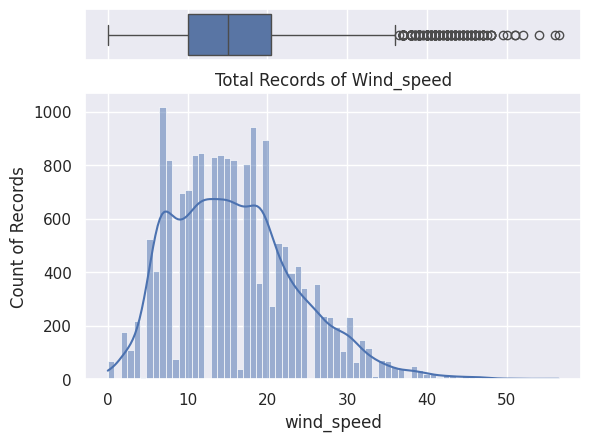

In [ ]:
#make a plot using wind speed column
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='wind_speed', ax=ax_box)
sns.histplot(data=df, x="wind_speed", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
ax_hist.set_ylabel('Count of Records')
plt.title('Total Records of Wind_speed')
plt.show()

In [ ]:
df_wind_speed_zero.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,68,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.0,68.000000,68.000000
mean,2016-03-18 22:55:35.294117888,640.808824,8.933824,8.933824,83.433824,0.0,2.176471,0.0,0.323529,1.823529
min,2015-01-04 02:00:00,25.000000,-1.000000,-1.000000,36.000000,0.0,1.000000,0.0,0.000000,0.000000
25%,2015-10-29 20:00:00,114.000000,4.000000,4.000000,78.500000,0.0,1.000000,0.0,0.000000,1.000000
50%,2016-03-04 00:00:00,404.500000,9.000000,9.000000,87.000000,0.0,1.000000,0.0,0.000000,2.000000
75%,2016-10-15 01:15:00,841.500000,12.125000,12.125000,93.000000,0.0,2.250000,0.0,1.000000,3.000000
max,2016-12-17 23:00:00,3887.000000,20.500000,20.500000,100.000000,0.0,26.000000,0.0,1.000000,3.000000
std,NaN,733.621120,5.621723,5.621723,12.073131,0.0,3.291514,0.0,0.471301,1.050106


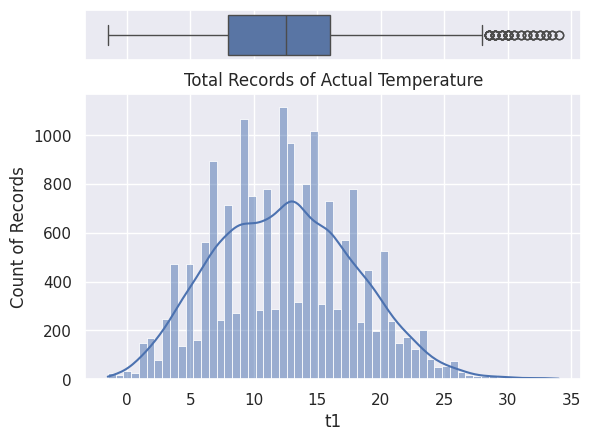

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='t1', ax=ax_box)
sns.histplot(data=df, x="t1", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
ax_hist.set_ylabel('Count of Records')
plt.title('Total Records of Actual Temperature')
plt.show()

In [ ]:
df = df.rename(columns={"season_0.0": "spring", "season_1.0": "summer","season_2.0": "fall", "season_3.0": "winter"})

In [ ]:
df = df.rename(columns={"1": "spring", "season_1.0": "summer","season_2.0": "fall", "season_3.0": "winter"})

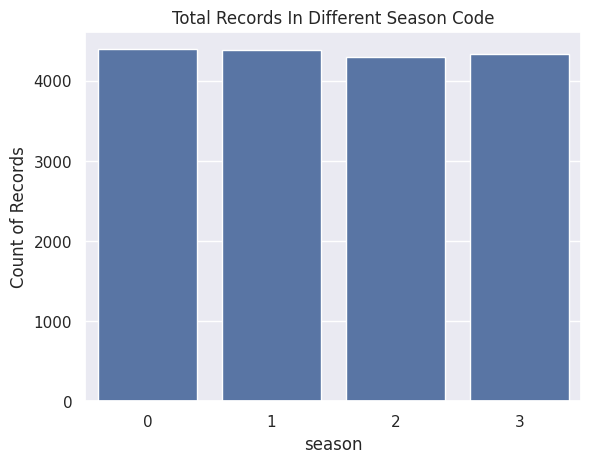

In [ ]:
sns.countplot(data=df,x='season')
plt.ylabel('Count of Records')
plt.title('Total Records In Different Season Code')
plt.show()

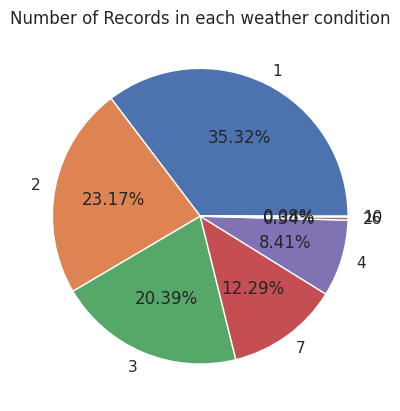

In [ ]:
type_value_count = df['weather_code'].value_counts(normalize=True) * 100
labels = type_value_count.index.tolist()  # Get the index values as labels
plt.pie(type_value_count, labels=labels, autopct='%1.2f%%')
plt.title('Number of Records in each weather condition')
plt.show()
#1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3
#= Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

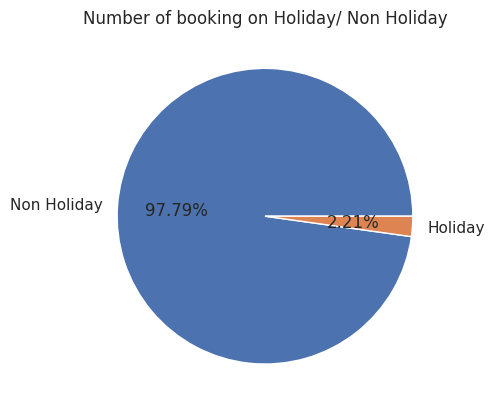

In [ ]:
type_value_count = df['is_holiday'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=['Non Holiday','Holiday'],autopct='%1.2f%%')
plt.title('Number of booking on Holiday/ Non Holiday')
plt.show()

# **Descriptive Statistics 2) Bivariate Analysis**

In [ ]:
season_names = {0:'Spring',1:'Summer',2:'Fall',3:'Winter'}
df['season'] = df['season'].map(season_names)

In [ ]:
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,Winter


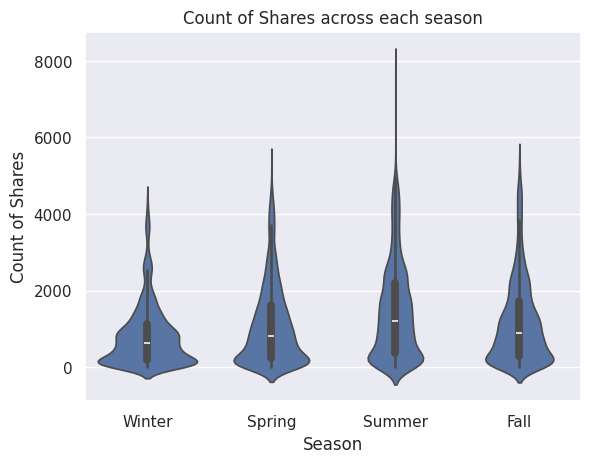

In [ ]:
sns.violinplot(y='cnt',x='season',data=df)
plt.title('Count of Shares across each season')
plt.xlabel('Season')
plt.ylabel('Count of Shares')
plt.show()

In [ ]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619


In [ ]:
df1=df.copy()

In [ ]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [ ]:
#create column year and month from timestamp
df1['year'] = df1['timestamp'].dt.year
df1['month'] = df1['timestamp'].dt.month
df1['day'] = df1['timestamp'].dt.day
df1['hour'] = df1['timestamp'].dt.hour
df1 = df1.drop("timestamp", axis=1)

In [ ]:
df1.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3,0,1,Winter,2015,1,4,0
1,138,3.0,2.5,93.0,5.0,1,0,1,Winter,2015,1,4,1
2,134,2.5,2.5,96.5,0.0,1,0,1,Winter,2015,1,4,2
3,72,2.0,2.0,100.0,0.0,1,0,1,Winter,2015,1,4,3
4,47,2.0,0.0,93.0,6.5,1,0,1,Winter,2015,1,4,4


In [ ]:
df1.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,year,month,day,hour
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,2015.507810,6.514643,15.751981,11.513265
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,0.508157,3.452509,8.793704,6.915893
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,2016.000000,7.000000,16.000000,12.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2016.000000,10.000000,23.000000,18.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000


In [ ]:
month_names = {1:'January',2:'February',3:'March',4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10: 'October', 11:'November', 12: 'December'}
df1['month'] = df1['month'].map(month_names)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

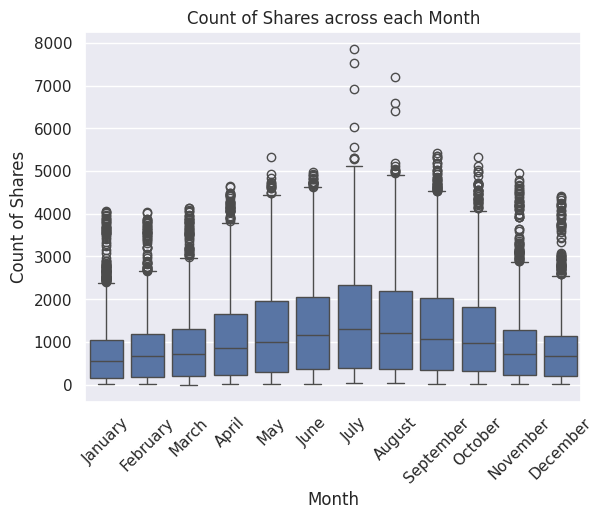

In [ ]:
sns.boxplot(data=df1, x='month', y='cnt')
plt.title('Count of Shares across each Month')
plt.xlabel('Month')
plt.ylabel('Count of Shares')
plt.xticks(rotation=45)

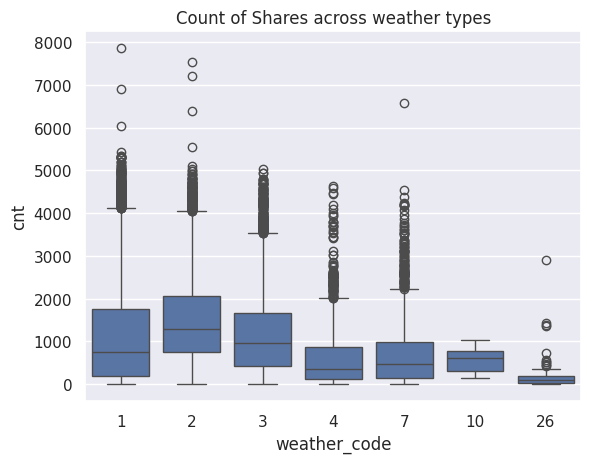

In [ ]:
sns.boxplot(y='cnt',x='weather_code',data=df)
plt.title('Count of Shares across weather types')
plt.show()

In [ ]:
df['weather_code'].value_counts(ascending=False)

weather_code
1     6150
2     4034
3     3551
7     2141
4     1464
26      60
10      14
Name: count, dtype: int64

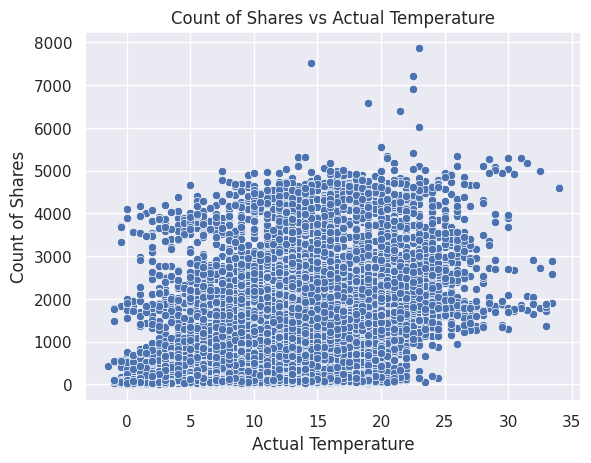

In [ ]:
sns.scatterplot(x='t1',y='cnt',data=df)
plt.title('Count of Shares vs Actual Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Count of Shares')
plt.show()

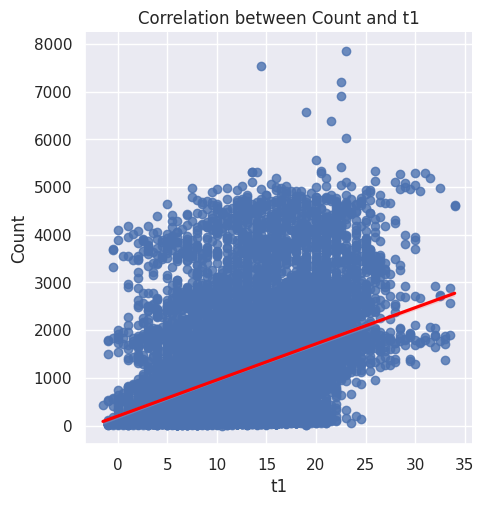

In [ ]:
#Count vs t1(corelation line)
sns.lmplot(x='t1', y='cnt', data=df, line_kws={'color': 'red'})
plt.title('Correlation between Count and t1')
plt.xlabel('t1')
plt.ylabel('Count')
plt.show()

In [ ]:
correlation = df['t1'].corr(df['t1'])
print

<function print>

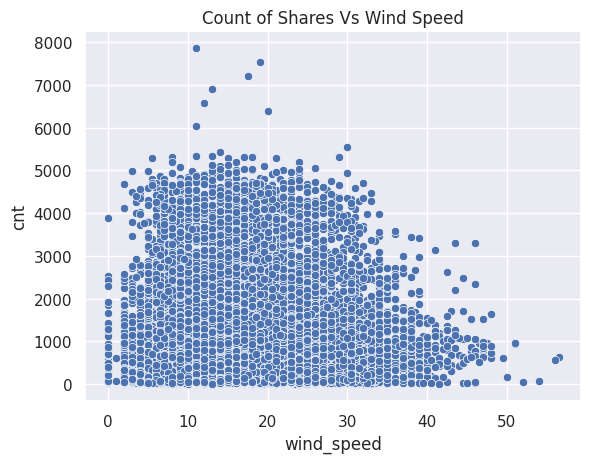

In [ ]:
sns.scatterplot(x='wind_speed',y='cnt',data=df)
plt.title('Count of Shares Vs Wind Speed')
plt.show()

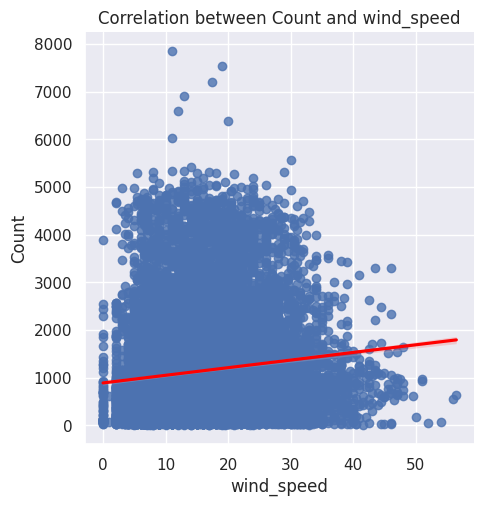

In [ ]:
sns.lmplot(x='wind_speed', y='cnt', data=df, line_kws={'color': 'red'})
plt.title('Correlation between Count and wind_speed')
plt.xlabel('wind_speed')
plt.ylabel('Count')
plt.show()

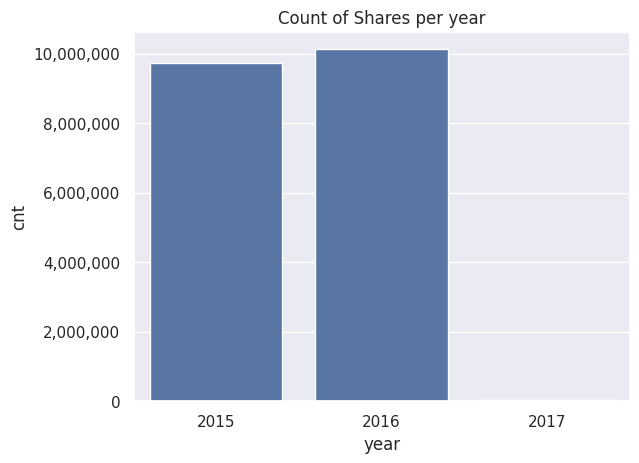

In [ ]:
year_data = df1.groupby(['year'])['cnt'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Count of Shares per year')
plt.show()

In [ ]:
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,Winter
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,Winter
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,Winter
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,Winter
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,Winter


In [ ]:
df1.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,182,3.0,2.0,93.0,6.0,3,0,1,Winter,2015,January,4,0
1,138,3.0,2.5,93.0,5.0,1,0,1,Winter,2015,January,4,1
2,134,2.5,2.5,96.5,0.0,1,0,1,Winter,2015,January,4,2
3,72,2.0,2.0,100.0,0.0,1,0,1,Winter,2015,January,4,3
4,47,2.0,0.0,93.0,6.5,1,0,1,Winter,2015,January,4,4


# **Identify and Eliminate Collinearity**

In [ ]:
cols_to_plot = ['t1', 't2', 'hum', 'wind_speed']

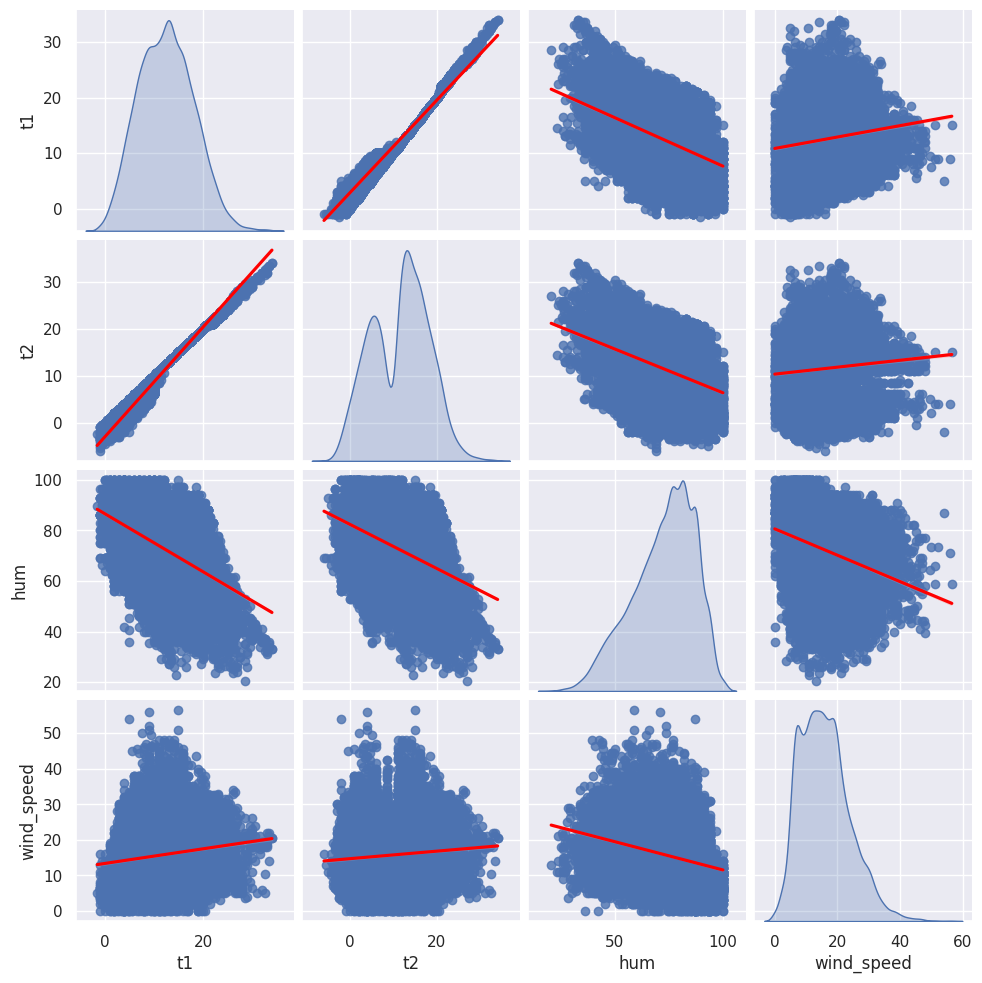

In [ ]:
sns.pairplot(df[cols_to_plot], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [ ]:
# List of columns to plot
cols_to_plot = ['t1', 't2', 'hum', 'wind_speed']

# Select only the columns you want to include in the heatmap
df_subset = df[cols_to_plot]

# Calculate correlation matrix
corr_matrix = df_subset.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Further Preparation for ML Techniques**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  int64  
 6   is_holiday    17414 non-null  int64  
 7   is_weekend    17414 non-null  int64  
 8   season        17414 non-null  object 
 9   year          17414 non-null  int32  
 10  month         17414 non-null  object 
 11  day           17414 non-null  int32  
 12  hour          17414 non-null  int32  
dtypes: float64(4), int32(3), int64(4), object(2)
memory usage: 1.5+ MB


In [ ]:
#checking unique vaiues
df1.nunique()

cnt             3781
t1                73
t2                82
hum              143
wind_speed       103
weather_code       7
is_holiday         2
is_weekend         2
season             4
year               3
month             12
day               31
hour              24
dtype: int64

In [ ]:
df2=df1.copy()

In [ ]:
df2 = pd.get_dummies(df2, columns=['weather_code', 'season', 'hour', 'month', 'year'])

In [ ]:
df2=df2.drop(columns =['t2'])


In [ ]:
print("\nSummary statistics:")
df2.describe()


Summary statistics:


,cnt,t1,hum,wind_speed,is_holiday,is_weekend,day
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,72.324954,15.913063,0.022051,0.285403,15.751981
std,1085.108068,5.571818,14.313186,7.894570,0.146854,0.451619,8.793704
min,0.000000,-1.500000,20.500000,0.000000,0.000000,0.000000,1.000000
25%,257.000000,8.000000,63.000000,10.000000,0.000000,0.000000,8.000000
50%,844.000000,12.500000,74.500000,15.000000,0.000000,0.000000,16.000000
75%,1671.750000,16.000000,83.000000,20.500000,0.000000,1.000000,23.000000
max,7860.000000,34.000000,100.000000,56.500000,1.000000,1.000000,31.000000


In [ ]:
#Create df3 with outliers removed

In [ ]:
df3=df2.copy()

In [ ]:
df4=df2.copy()

In [ ]:
Q1 = df3['cnt'].quantile(0.25)
Q3 = df3['cnt'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers = df3[(df3['cnt'] < Q1 - 1.5 * IQR) | (df3['cnt'] > Q3 + 1.5 * IQR)]
outliers

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,day,weather_code_1,weather_code_2,weather_code_3,...,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2015,year_2016,year_2017
223,3960,9.0,71.0,16.0,0,0,13,False,True,False,...,False,False,False,False,False,False,False,True,False,False
247,3904,4.0,70.0,26.0,0,0,14,False,True,False,...,False,False,False,False,False,False,False,True,False,False
439,3828,2.0,81.0,5.0,0,0,22,False,False,True,...,False,False,False,False,False,False,False,True,False,False
559,3835,5.5,78.5,15.0,0,0,27,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1230,3841,6.0,76.0,20.0,0,0,24,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16870,3982,5.5,96.5,9.0,0,0,12,False,True,False,...,False,False,False,False,False,False,False,False,True,False
16894,4258,10.5,91.0,6.0,0,0,13,False,False,True,...,False,False,False,False,False,False,False,False,True,False
16918,4162,9.0,94.0,7.0,0,0,14,True,False,False,...,False,False,False,False,False,False,False,False,True,False
16942,4198,8.5,93.5,12.0,0,0,15,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
df3 = df3.drop(outliers.index)

In [ ]:
print("\nSummary statistics:")
df3.describe()


Summary statistics:


,cnt,t1,hum,wind_speed,is_holiday,is_weekend,day
count,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000
mean,1014.344107,12.292839,72.715589,15.891247,0.022940,0.294641,15.764741
std,888.307874,5.484744,14.097128,7.935695,0.149718,0.455895,8.804781
min,0.000000,-1.500000,20.500000,0.000000,0.000000,0.000000,1.000000
25%,236.000000,8.000000,63.500000,10.000000,0.000000,0.000000,8.000000
50%,798.000000,12.000000,75.000000,15.000000,0.000000,0.000000,16.000000
75%,1536.000000,16.000000,83.000000,20.500000,0.000000,1.000000,23.000000
max,3793.000000,33.500000,100.000000,56.500000,1.000000,1.000000,31.000000


**Linear Regression - Outliers Remain**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('cnt', axis=1), df2['cnt'], test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print("Intercept: \n",regressor.intercept_)
print("Coefficients: \n",regressor.coef_)

Intercept: 
 -71532959780687.62
Coefficients: 
 [ 3.61154990e+01 -1.30997284e+01 -8.00327381e+00 -3.15038107e+02
 -2.22239103e+02 -2.23545779e+00  2.93036203e+13  2.93036203e+13
  2.93036203e+13  2.93036203e+13  2.93036203e+13  2.93036203e+13
  2.93036203e+13  4.88888985e+13 -6.32246558e+13  8.97106432e+12
  1.51166472e+13  1.73788983e+12  1.73788983e+12  1.73788983e+12
  1.73788983e+12  1.73788983e+12  1.73788983e+12  1.73788983e+12
  1.73788983e+12  1.73788984e+12  1.73788983e+12  1.73788983e+12
  1.73788983e+12  1.73788983e+12  1.73788983e+12  1.73788983e+12
  1.73788983e+12  1.73788983e+12  1.73788984e+12  1.73788983e+12
  1.73788983e+12  1.73788983e+12  1.73788983e+12  1.73788983e+12
  1.73788983e+12  8.91749111e+13  1.69791910e+13  1.08336082e+13
  1.08336082e+13  1.08336082e+13  1.69791910e+13  1.69791910e+13
  8.91749111e+13  8.91749111e+13 -2.29386431e+13 -2.29386431e+13
 -2.29386431e+13  1.45411943e+13  1.45411943e+13  1.45411943e+13]


In [ ]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 0.727
MSE: 326836.327
RMSE: 571.696
MAE: 394.160


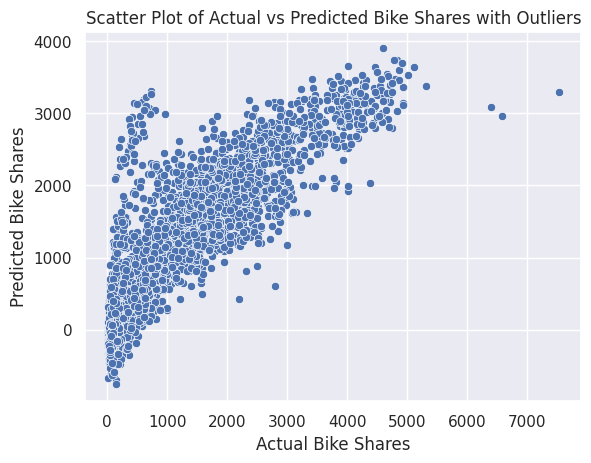

In [ ]:
data = {'Actual': y_test, 'Predicted': y_pred}
df2_new = pd.DataFrame(data)
sns.scatterplot(x='Actual', y='Predicted', data=df2_new)
plt.xlabel('Actual Bike Shares')
plt.ylabel('Predicted Bike Shares')
plt.title('Scatter Plot of Actual vs Predicted Bike Shares with Outliers')
plt.show()

In [ ]:
df2 = pd.DataFrame({
    'Actual': y_test, 'Predicted': y_pred
})
print(df2)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

       Actual    Predicted
14097      66   385.125000
10978    1749  1413.765625
7408      172   465.000000
6375     2866  1629.171875
6874     1550  2350.328125
...       ...          ...
3903       98   401.000000
8489     2194   426.937500
9717       65   -81.906250
1662      452  2438.640625
455       171  -162.578125

[3483 rows x 2 columns]

Mean Squared Error: 326836.3266000148


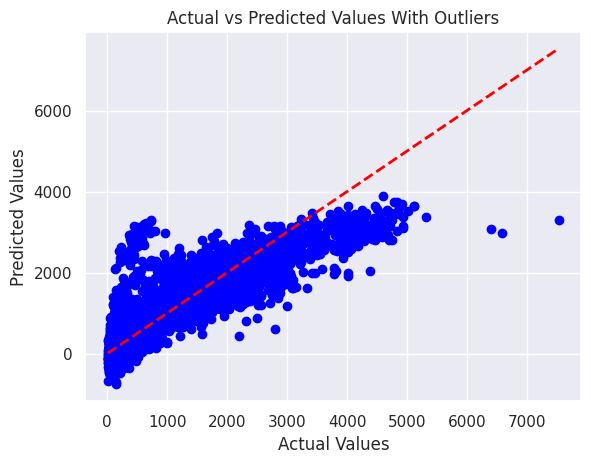

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values With Outliers')
plt.show()

**Linear Regression with Outliers Removed**

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16739 entries, 0 to 17413
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cnt              16739 non-null  int64  
 1   t1               16739 non-null  float64
 2   hum              16739 non-null  float64
 3   wind_speed       16739 non-null  float64
 4   is_holiday       16739 non-null  int64  
 5   is_weekend       16739 non-null  int64  
 6   day              16739 non-null  int32  
 7   weather_code_1   16739 non-null  bool   
 8   weather_code_2   16739 non-null  bool   
 9   weather_code_3   16739 non-null  bool   
 10  weather_code_4   16739 non-null  bool   
 11  weather_code_7   16739 non-null  bool   
 12  weather_code_10  16739 non-null  bool   
 13  weather_code_26  16739 non-null  bool   
 14  season_Fall      16739 non-null  bool   
 15  season_Spring    16739 non-null  bool   
 16  season_Summer    16739 non-null  bool   
 17  season_Winter    

In [ ]:
print("\nSummary statistics:")
df3.describe()


Summary statistics:


,cnt,t1,hum,wind_speed,is_holiday,is_weekend,day
count,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000,16739.000000
mean,1014.344107,12.292839,72.715589,15.891247,0.022940,0.294641,15.764741
std,888.307874,5.484744,14.097128,7.935695,0.149718,0.455895,8.804781
min,0.000000,-1.500000,20.500000,0.000000,0.000000,0.000000,1.000000
25%,236.000000,8.000000,63.500000,10.000000,0.000000,0.000000,8.000000
50%,798.000000,12.000000,75.000000,15.000000,0.000000,0.000000,16.000000
75%,1536.000000,16.000000,83.000000,20.500000,0.000000,1.000000,23.000000
max,3793.000000,33.500000,100.000000,56.500000,1.000000,1.000000,31.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('cnt', axis=1), df3['cnt'], test_size=0.2, random_state=42)

In [ ]:
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
print("Intercept: \n",regressor.intercept_)
print("Coefficients: \n",regressor.coef_)

Intercept: 
 31611850886932.57
Coefficients: 
 [ 3.03281161e+01 -1.09548793e+01 -7.69841214e+00 -2.07249267e+02
 -1.37295075e+02 -1.67844557e+00  3.59539274e+12  3.59539274e+12
  3.59539274e+12  3.59539274e+12  3.59539274e+12  3.59539274e+12
  3.59539274e+12 -2.67393721e+13 -3.64119665e+13 -7.83824906e+13
 -2.91197583e+13  2.72702715e+11  2.72702715e+11  2.72702715e+11
  2.72702715e+11  2.72702715e+11  2.72702715e+11  2.72702715e+11
  2.72702716e+11  2.72702716e+11  2.72702716e+11  2.72702716e+11
  2.72702716e+11  2.72702716e+11  2.72702716e+11  2.72702716e+11
  2.72702716e+11  2.72702716e+11  2.72702717e+11  2.72702717e+11
  2.72702716e+11  2.72702716e+11  2.72702715e+11  2.72702715e+11
  2.72702715e+11  6.83381920e+12  4.88043434e+13 -4.58388965e+11
 -4.58388965e+11 -4.58388965e+11  4.88043434e+13  4.88043434e+13
  6.83381920e+12  6.83381920e+12 -2.83877522e+12 -2.83877522e+12
 -2.83877522e+12 -5.90179907e+12 -5.90179907e+12 -5.90179907e+12]


In [ ]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 0.691
MSE: 244031.900
RMSE: 493.996
MAE: 343.390


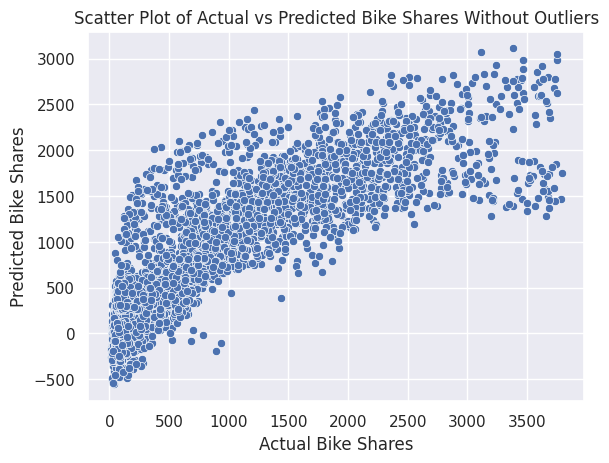

In [ ]:
data = {'Actual': y_test, 'Predicted': y_pred}
df3_new = pd.DataFrame(data)
sns.scatterplot(x='Actual', y='Predicted', data=df3_new)
plt.xlabel('Actual Bike Shares')
plt.ylabel('Predicted Bike Shares')
plt.title('Scatter Plot of Actual vs Predicted Bike Shares Without Outliers')
plt.show()

In [ ]:
df3 = pd.DataFrame({
    'Actual': y_test, 'Predicted': y_pred
})
print(df3)

       Actual    Predicted
15010    2295  2520.324219
6262      520   594.875000
5752     1878  1600.546875
99         32  -195.652344
11382      46   107.542969
...       ...          ...
4444     1749  1774.191406
6864      228  1425.433594
872      1729  1346.722656
8192       49  -453.660156
15        869   727.648438

[3348 rows x 2 columns]


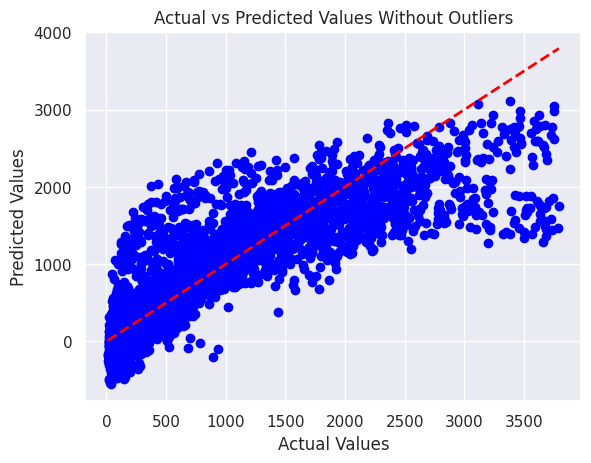

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values Without Outliers')
plt.show()

Decided to keep outliers

In [ ]:
print("\nSummary statistics:")
df4.describe()


Summary statistics:


,cnt,t1,hum,wind_speed,is_holiday,is_weekend,day
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,72.324954,15.913063,0.022051,0.285403,15.751981
std,1085.108068,5.571818,14.313186,7.894570,0.146854,0.451619,8.793704
min,0.000000,-1.500000,20.500000,0.000000,0.000000,0.000000,1.000000
25%,257.000000,8.000000,63.000000,10.000000,0.000000,0.000000,8.000000
50%,844.000000,12.500000,74.500000,15.000000,0.000000,0.000000,16.000000
75%,1671.750000,16.000000,83.000000,20.500000,0.000000,1.000000,23.000000
max,7860.000000,34.000000,100.000000,56.500000,1.000000,1.000000,31.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df4.drop('cnt', axis=1), df4['cnt'], test_size=0.2, random_state=42)

In [ ]:
lasso_reg = Lasso(alpha=0.1)

In [ ]:
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred = lasso_reg.predict(X_test)

In [ ]:
r2_lasso = r2_score(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lasso = mean_absolute_error(y_test, y_pred)

In [ ]:
print("R2 score (Lasso):", r2_lasso)
print("MSE score (Lasso):", mse_lasso)
print("RMSE score (Lasso):", rmse_lasso)
print("MAE score (Lasso):", mae_lasso)

R2 score (Lasso): 0.7273384167425374
MSE score (Lasso): 326714.8261963699
RMSE score (Lasso): 571.5897359088684
MAE score (Lasso): 393.80638746391566


**Random Forest**

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
predicted_demand = rf_model.predict(X_test)
predicted_demand = np.round(predicted_demand).astype(int)

# Create a DataFrame to hold actual and predicted values
df_predicted_actual = pd.DataFrame({
    'Actual': y_test, 'Predicted': predicted_demand
})

# Print the DataFrame
print(df_predicted_actual)

       Actual  Predicted
14097      66         71
10978    1749       2055
7408      172        225
6375     2866       2818
6874     1550       1167
...       ...        ...
3903       98         98
8489     2194        524
9717       65         75
1662      452        384
455       171        109

[3483 rows x 2 columns]


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print('R2 score:', r2)
print('MSE score:', mse)
print('RMSE score:', rmse)
print('MAE score:', mae)

R2 score: 0.9400647085966964
MSE score: 71817.04176993971
RMSE score: 267.9870179130693
MAE score: 149.62767441860464


**Gradient Boost**

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)

In [ ]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=42)

In [ ]:
predicted_demand = gb_model.predict(X_test)

In [ ]:
predicted_demand = np.round(predicted_demand).astype(int)

In [ ]:
df_predicted_actual = pd.DataFrame({
    'Actual': y_test, 'Predicted': predicted_demand
})
print(df_predicted_actual)

       Actual  Predicted
14097      66        133
10978    1749       2053
7408      172        341
6375     2866       2555
6874     1550       1227
...       ...        ...
3903       98        198
8489     2194        776
9717       65        112
1662      452        474
455       171        158

[3483 rows x 2 columns]


In [ ]:
mse = mean_squared_error(y_test, predicted_demand)
r2 = r2_score(y_test, predicted_demand)
rmse = sqrt(mean_squared_error(y_test, predicted_demand))
mae = mean_absolute_error(y_test, predicted_demand)

In [ ]:
print("MSE score (Gradient Boosting):", mse)
print("R2 score (Gradient Boosting):", r2)
print("RMSE score (Gradient Boosting):", rmse)
print("MAE score (Gradient Boosting):", mae)

MSE score (Gradient Boosting): 66790.80419178869
R2 score (Gradient Boosting): 0.9442593817060922
RMSE score (Gradient Boosting): 258.43916922902514
MAE score (Gradient Boosting): 160.78409417169107


**Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_model = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

In [ ]:
adaboost_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:
predicted_demand = adaboost_model.predict(X_test)

In [ ]:
predicted_demand = np.round(predicted_demand).astype(int)

In [ ]:
df_predicted_actual = pd.DataFrame({
    'Actual': y_test, 'Predicted': predicted_demand
})

# Print the DataFrame
print(df_predicted_actual)

       Actual  Predicted
14097      66       1139
10978    1749        898
7408      172       1358
6375     2866       2123
6874     1550       1790
...       ...        ...
3903       98        936
8489     2194        982
9717       65        898
1662      452       1699
455       171        898

[3483 rows x 2 columns]


In [ ]:
mse = mean_squared_error(y_test, predicted_demand)
r2 = r2_score(y_test, predicted_demand)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predicted_demand)

In [ ]:
print("MSE score (AdaBoost):", mse)
print("R2 score (AdaBoost):", r2)
print("RMSE score (AdaBoost):", rmse)
print("MAE score (AdaBoost):", mae)

MSE score (AdaBoost): 653188.5001435544
R2 score (AdaBoost): 0.454878088367917
RMSE score (AdaBoost): 808.2007795984574
MAE score (AdaBoost): 693.9770312948608


**Hyperparameter tuning**

In [ ]:
n_estimators_values = [50, 100, 150, 200, 250]
scores = []
for n_estimators in n_estimators_values:
    adaboost_model.n_estimators = n_estimators
    adaboost_model.fit(X_train, y_train)
    score = adaboost_model.score(X_test, y_test)
    scores.append(score)
    print(f"n_estimators={n_estimators}: Score={score}")

n_estimators=50: Score=0.5477880450272355
n_estimators=100: Score=0.5134826553206978
n_estimators=150: Score=0.4868998246036209
n_estimators=200: Score=0.45492909953015837
n_estimators=250: Score=0.42509898974677973


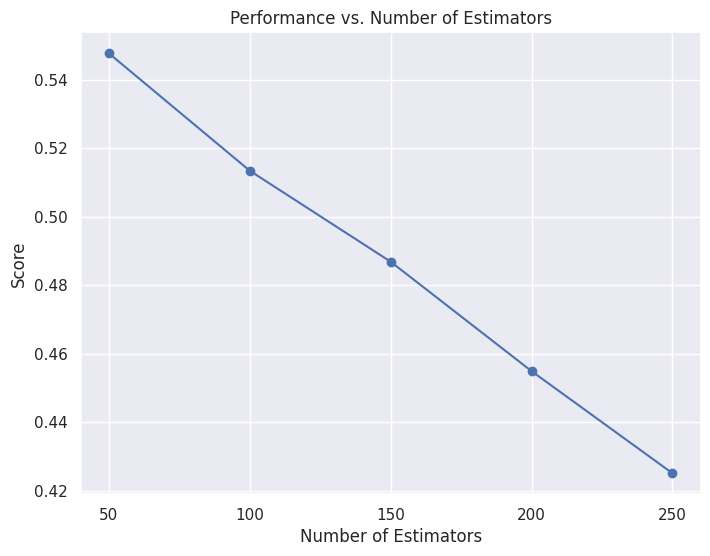

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_values, scores, marker='o', linestyle='-')
plt.title('Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.xticks(n_estimators_values)
plt.grid(True)
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [ ]:
ada_boost = AdaBoostRegressor(random_state=42)
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_model = grid_search.best_estimator_
best_model_score = best_model.score(X_test, y_test)
print("Best model score:", best_model_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.6s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.4s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   1.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   3.6s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   3.4s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   3.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.8s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   2.7s
[CV] END ...............learning_rate=0.01, n_estimators=150; total time=   5.5s
[CV] END ...............learning_rate=0.01, n_es

In [ ]:
predictions = best_model.predict(X_test)

In [ ]:
df_predicted_actual = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_demand})
print(df_predicted_actual)

       Actual  Predicted
14097      66       1139
10978    1749        898
7408      172       1358
6375     2866       2123
6874     1550       1790
...       ...        ...
3903       98        936
8489     2194        982
9717       65        898
1662      452       1699
455       171        898

[3483 rows x 2 columns]


In [ ]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("RMSE score:", rmse)

R² Score: 0.5477880450272355
Mean Squared Error: 541859.7974373923
RMSE score: 736.111267022447
